Temperature Forecast Project using ML
Problem Statement:

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature


Note: Use the link below to download the dataset. 
Downlaod Files:

    https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import stats
import statistics as st

In [41]:
df=pd.read_csv('Temperature Forecast Project using ML.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [42]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [44]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

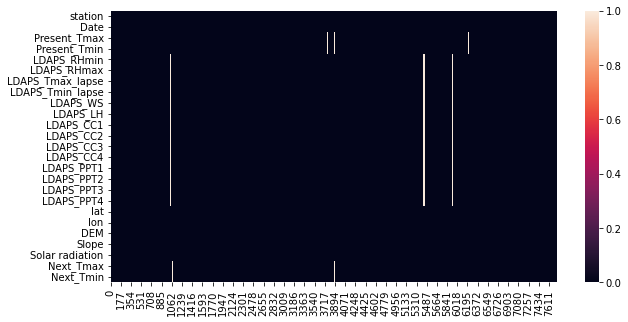

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull().transpose())

In [46]:
df.dropna(inplace=True)

<AxesSubplot:>

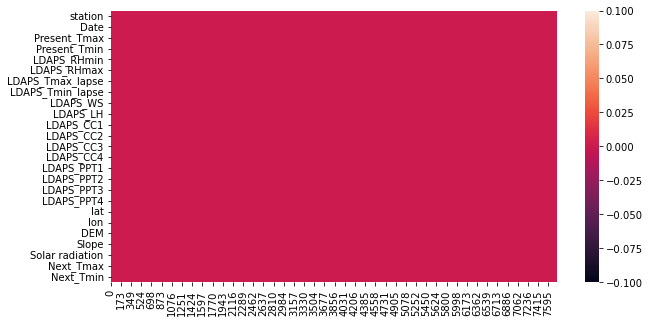

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull().transpose())

In [48]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


# Applying Encoder

In [49]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Date']=enc.fit_transform(df['Date'].values.reshape(-1,1))

In [50]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,288,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,288,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,288,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,288,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,288,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Data Description

In [51]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,152.971402,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,88.582041,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,76.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,153.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,230.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,306.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


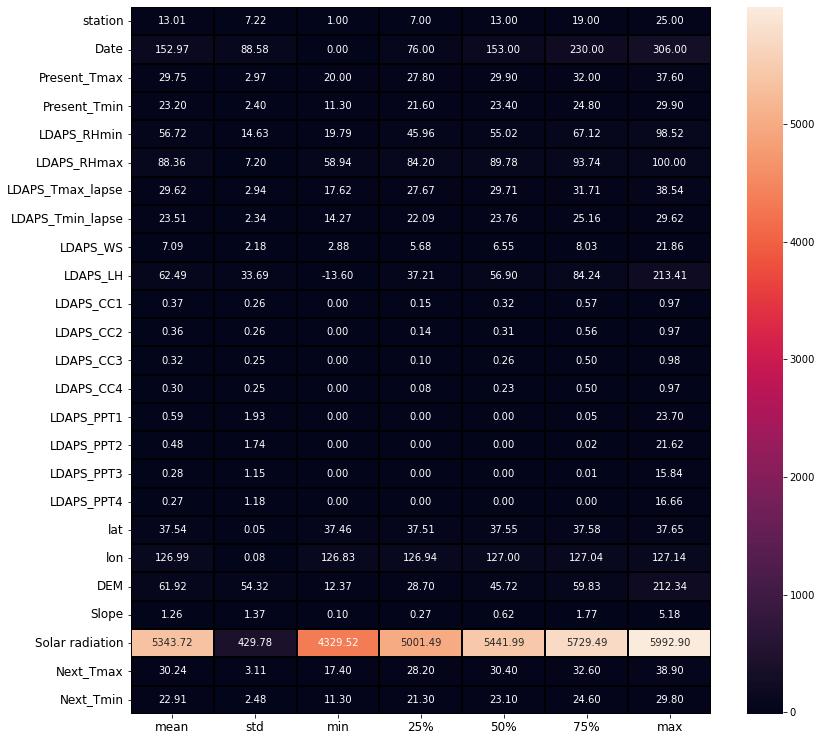

In [52]:
plt.figure(figsize=(13,13))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Correlation

In [53]:
df.corr()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,-0.000715,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Date,-0.000715,1.000000,-0.146420,-0.111763,-0.067340,-0.020293,-0.156538,-0.171036,-0.045460,-0.016545,...,-0.007390,0.004374,-0.033346,0.000845,-0.002540,0.000964,0.000650,-0.440027,-0.122771,-0.133439
Present_Tmax,0.113301,-0.146420,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,-0.111763,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.067340,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.020293,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,-0.156538,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,-0.171036,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.045460,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,-0.016545,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392


<AxesSubplot:>

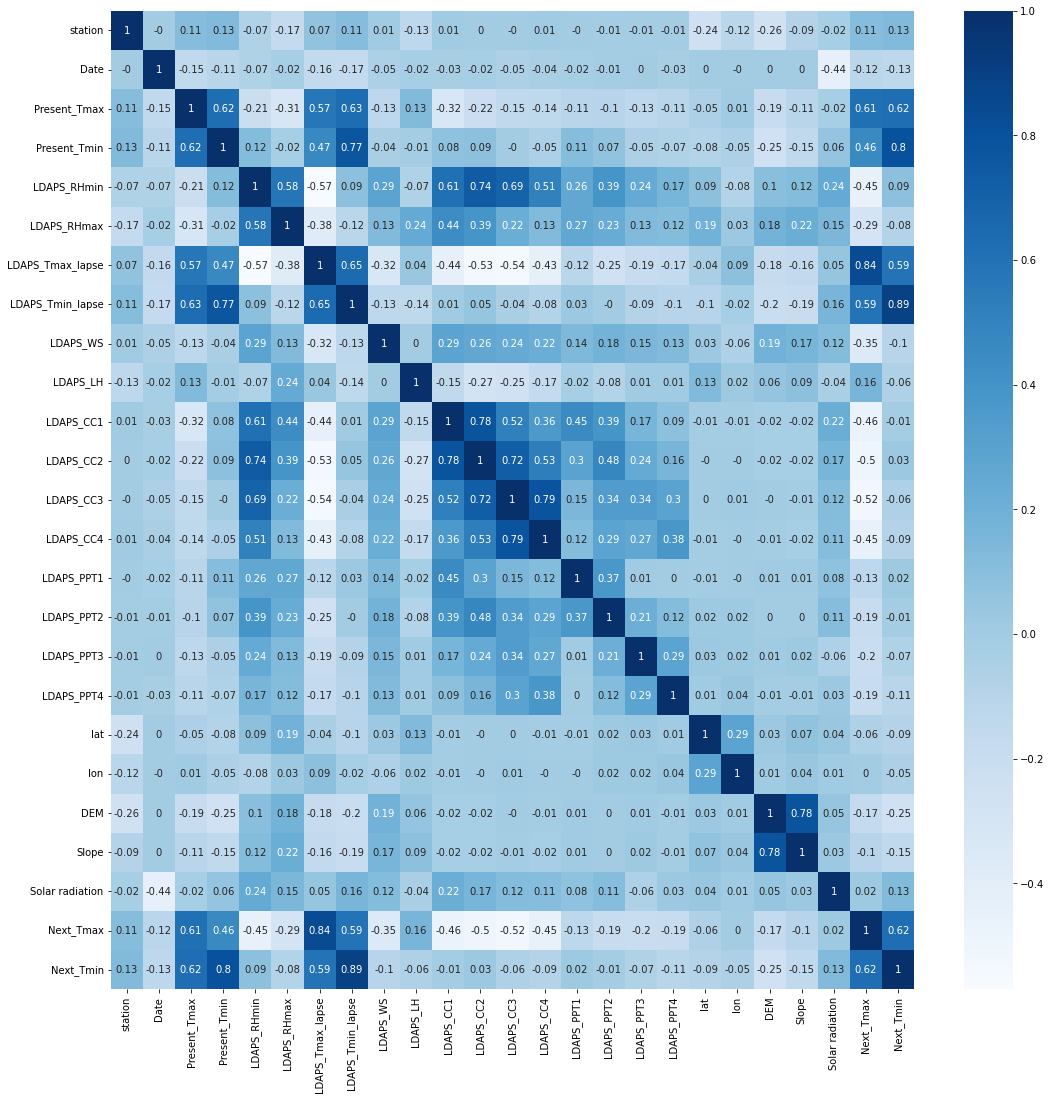

In [54]:
plt.figure(figsize=(18,18))
sns.heatmap(round(df.corr(),2),cmap='Blues',annot=True)

In [55]:
df.corr()['Next_Tmax']

station             0.107747
Date               -0.122771
Present_Tmax        0.610357
Present_Tmin        0.463523
LDAPS_RHmin        -0.446824
LDAPS_RHmax        -0.289788
LDAPS_Tmax_lapse    0.835729
LDAPS_Tmin_lapse    0.592119
LDAPS_WS           -0.351107
LDAPS_LH            0.156779
LDAPS_CC1          -0.459705
LDAPS_CC2          -0.498295
LDAPS_CC3          -0.523061
LDAPS_CC4          -0.454039
LDAPS_PPT1         -0.125954
LDAPS_PPT2         -0.186722
LDAPS_PPT3         -0.203554
LDAPS_PPT4         -0.190720
lat                -0.055367
lon                 0.003502
DEM                -0.174578
Slope              -0.104279
Solar radiation     0.016145
Next_Tmax           1.000000
Next_Tmin           0.616629
Name: Next_Tmax, dtype: float64

In [56]:
df.corr()['Next_Tmin']

station             0.128184
Date               -0.133439
Present_Tmax        0.621048
Present_Tmin        0.796975
LDAPS_RHmin         0.093249
LDAPS_RHmax        -0.076415
LDAPS_Tmax_lapse    0.589963
LDAPS_Tmin_lapse    0.886513
LDAPS_WS           -0.102021
LDAPS_LH           -0.060392
LDAPS_CC1          -0.012877
LDAPS_CC2           0.030358
LDAPS_CC3          -0.056490
LDAPS_CC4          -0.086197
LDAPS_PPT1          0.018031
LDAPS_PPT2         -0.012462
LDAPS_PPT3         -0.068664
LDAPS_PPT4         -0.114900
lat                -0.085136
lon                -0.045758
DEM                -0.249303
Slope              -0.148379
Solar radiation     0.125517
Next_Tmax           0.616629
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

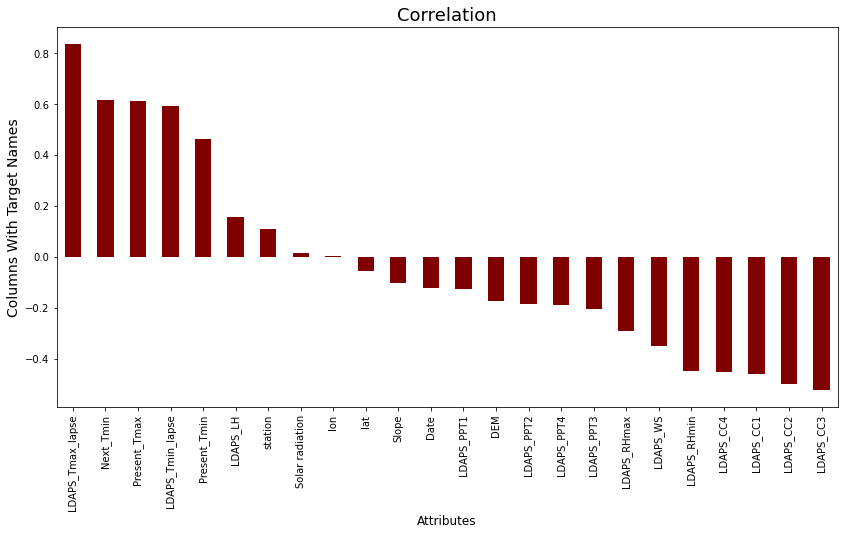

In [57]:
plt.figure(figsize=(14,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='maroon')
plt.xlabel('Attributes',fontsize=12)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

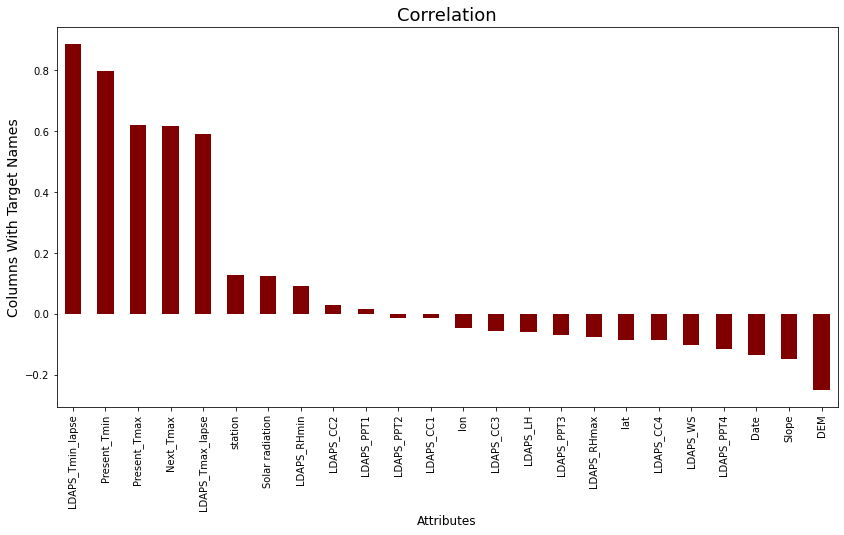

In [58]:
plt.figure(figsize=(14,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='maroon')
plt.xlabel('Attributes',fontsize=12)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Min Air Temperature(Next_Tmin)

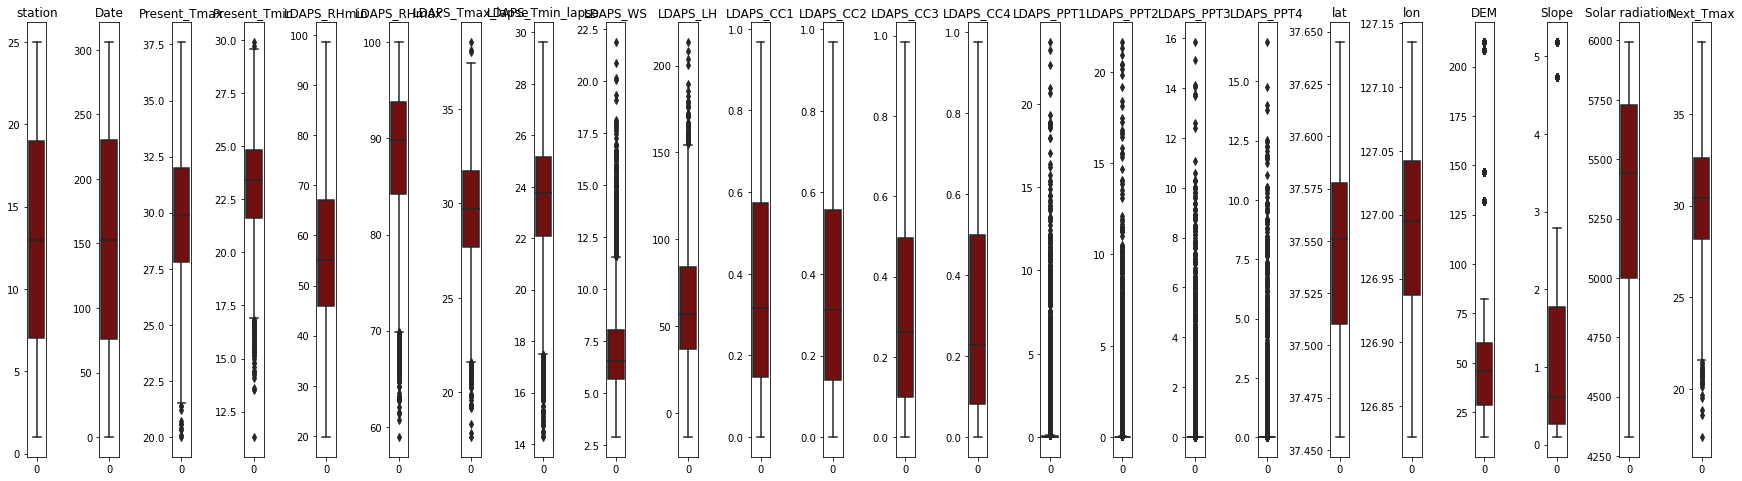

In [59]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)-1):
    plt.subplot(nrows,ncol,i+1)
    plt.title(df.columns[i])
    sns.boxplot(data=df[collist[i]],color='maroon',orient='v')
    plt.tight_layout()

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(df.drop(['Next_Tmin'],axis=1)))
z.shape

(7588, 24)

In [61]:
threshold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))

In [62]:
len(np.where(z>3)[0])

1085

In [63]:
x=df.drop(['Next_Tmin'],axis=1)
y=df['Next_Tmin']

In [64]:
x.skew()

station            -0.004178
Date               -0.000885
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
dtype: float64

In [65]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [66]:
x.skew()

station            -0.206291
Date               -0.283408
Present_Tmax       -0.036516
Present_Tmin       -0.014363
LDAPS_RHmin        -0.018008
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.012155
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.048221
LDAPS_CC2           0.047595
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.000000
lon                -0.202301
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmax          -0.039960
dtype: float64

# Choosing Best Model

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [68]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc," on Random State: ",maxRS)

At random state 0,the training accuracy is:- 0.8488785976691207
At random state 0,the testing accuracy is:- 0.8520139321769026


At random state 1,the training accuracy is:- 0.8507111400657804
At random state 1,the testing accuracy is:- 0.8437771700787836


At random state 2,the training accuracy is:- 0.8490319907558633
At random state 2,the testing accuracy is:- 0.8504972878028972


At random state 3,the training accuracy is:- 0.8498498034262066
At random state 3,the testing accuracy is:- 0.8480594659496635


At random state 4,the training accuracy is:- 0.847502199220919
At random state 4,the testing accuracy is:- 0.8568893296535516


At random state 5,the training accuracy is:- 0.8487017029841637
At random state 5,the testing accuracy is:- 0.8521665587926244


At random state 6,the training accuracy is:- 0.8517129724854563
At random state 6,the testing accuracy is:- 0.8401943972986173


At random state 7,the training accuracy is:- 0.8474415740115552
At random state 7,the testing accu

At random state 72,the testing accuracy is:- 0.8456476158525372


At random state 73,the training accuracy is:- 0.853216124740362
At random state 73,the testing accuracy is:- 0.8333815209141407


At random state 74,the training accuracy is:- 0.8510685763852681
At random state 74,the testing accuracy is:- 0.8427114895872818


At random state 75,the training accuracy is:- 0.8490753693199298
At random state 75,the testing accuracy is:- 0.8508917655218347


At random state 76,the training accuracy is:- 0.8501208144958655
At random state 76,the testing accuracy is:- 0.8463640536557444


At random state 77,the training accuracy is:- 0.8494647167783304
At random state 77,the testing accuracy is:- 0.8496002929792604


At random state 78,the training accuracy is:- 0.8492912409477023
At random state 78,the testing accuracy is:- 0.8499481792895727


At random state 79,the training accuracy is:- 0.850895715002561
At random state 79,the testing accuracy is:- 0.8436942077699362


At random state 80,

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

kmaxAcc=0
kmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(features_train,target_train)
    pred_train=knr.predict(features_train)
    pred_test=knr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>kmaxAcc):
        kmaxAcc=acc
        kmaxRS=i
print("Best accuracy: ",kmaxAcc," on Random State: ",kmaxRS)

At random state 0,the training accuracy is:- 0.922566560480556
At random state 0,the testing accuracy is:- 0.8845012483955437


At random state 1,the training accuracy is:- 0.922864759755101
At random state 1,the testing accuracy is:- 0.8768899435821049


At random state 2,the training accuracy is:- 0.9209571374732901
At random state 2,the testing accuracy is:- 0.8908456826568754


At random state 3,the training accuracy is:- 0.9215730168995396
At random state 3,the testing accuracy is:- 0.895828066830664


At random state 4,the training accuracy is:- 0.9227442641509975
At random state 4,the testing accuracy is:- 0.8876210088721248


At random state 5,the training accuracy is:- 0.9202953806837573
At random state 5,the testing accuracy is:- 0.8891524977000661


At random state 6,the training accuracy is:- 0.9230247248496629
At random state 6,the testing accuracy is:- 0.8775720981931068


At random state 7,the training accuracy is:- 0.9220674679581065
At random state 7,the testing accura

At random state 63,the training accuracy is:- 0.9209559440942188
At random state 63,the testing accuracy is:- 0.8889408231654857


At random state 64,the training accuracy is:- 0.9222210160353472
At random state 64,the testing accuracy is:- 0.8868844992201025


At random state 65,the training accuracy is:- 0.9235287978597947
At random state 65,the testing accuracy is:- 0.8812967729575987


At random state 66,the training accuracy is:- 0.9214698009986393
At random state 66,the testing accuracy is:- 0.8888627154816556


At random state 67,the training accuracy is:- 0.9221948611372806
At random state 67,the testing accuracy is:- 0.8820395818118503


At random state 68,the training accuracy is:- 0.9220685489900775
At random state 68,the testing accuracy is:- 0.8878466134834052


At random state 69,the training accuracy is:- 0.9233808750372133
At random state 69,the testing accuracy is:- 0.8723260084344199


At random state 70,the training accuracy is:- 0.9180730701695238
At random state 70

In [70]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

dmaxAcc=0
dmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtr.fit(features_train,target_train)
    pred_train=dtr.predict(features_train)
    pred_test=dtr.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>dmaxAcc):
        dmaxAcc=acc
        dmaxRS=i
print("Best accuracy: ",dmaxAcc," on Random State: ",dmaxRS)

Best accuracy:  0.8261673034442544  on Random State:  85


In [71]:
from sklearn.svm import SVR
sv=SVR(kernel='linear')

smaxAcc=0
smaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    sv.fit(features_train,target_train)
    pred_train=sv.predict(features_train)
    pred_test=sv.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>smaxAcc):
        smaxAcc=acc
        smaxRS=i
print("Best accuracy: ",smaxAcc," on Random State: ",smaxRS)

Best accuracy:  0.8677149290584008  on Random State:  60


In [72]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knr,x,y,cv=5)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.6100171032974291


In [73]:
from sklearn.model_selection import GridSearchCV
parameters={'weights' : ['uniform', 'distance'],
           'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
           'n_neighbors':range(1,10),
           'leaf_size':range(10,60,10)}
clf=GridSearchCV(knr,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'distance'}


In [74]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(weights='distance',algorithm='ball_tree',n_neighbors=7,leaf_size=10)

kmaxAcc=0
kmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(features_train,target_train)
    pred_train=knr.predict(features_train)
    pred_test=knr.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>kmaxAcc):
        kmaxAcc=acc
        kmaxRS=i
print("Best accuracy: ",kmaxAcc," on Random State: ",kmaxRS)

Best accuracy:  0.9064585612422987  on Random State:  70


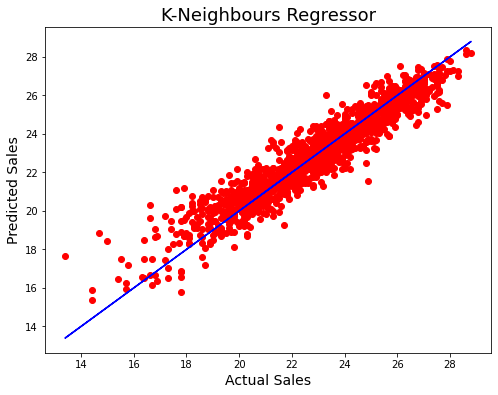

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('K-Neighbours Regressor',fontsize=18)
plt.show()

In [77]:
import joblib
joblib.dump(knr,'Minimum Temperature Forecast Model.pkl')

['Minimum Temperature Forecast Model.pkl']

# Max Air Temperature(Next_Tmax)

In [78]:
x=df.drop(['Next_Tmax'],axis=1)
y=df['Next_Tmax']

In [79]:
x.skew()

station            -0.004178
Date               -0.000885
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmin          -0.393662
dtype: float64

In [81]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [82]:
x.skew()

station            -0.040089
Date               -0.052559
Present_Tmax        0.001667
Present_Tmin       -0.007098
LDAPS_RHmin        -0.023570
LDAPS_RHmax         0.002040
LDAPS_Tmax_lapse   -0.007795
LDAPS_Tmin_lapse    0.002219
LDAPS_WS           -0.032077
LDAPS_LH           -0.053917
LDAPS_CC1           0.004380
LDAPS_CC2           0.006684
LDAPS_CC3           0.018560
LDAPS_CC4           0.032402
LDAPS_PPT1          1.054429
LDAPS_PPT2          1.190525
LDAPS_PPT3          1.256019
LDAPS_PPT4          1.490078
lat                 0.068029
lon                -0.013485
DEM                 0.009030
Slope               0.029592
Solar radiation    -0.044693
Next_Tmin          -0.006503
dtype: float64

# Choosing Best Model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [85]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc," on Random State: ",maxRS)

Best accuracy:  0.8173023204804079  on Random State:  30


In [86]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

kmaxAcc=0
kmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(features_train,target_train)
    pred_train=knr.predict(features_train)
    pred_test=knr.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>kmaxAcc):
        kmaxAcc=acc
        kmaxRS=i
print("Best accuracy: ",kmaxAcc," on Random State: ",kmaxRS)

Best accuracy:  0.8885294429508168  on Random State:  38


In [87]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

dmaxAcc=0
dmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtr.fit(features_train,target_train)
    pred_train=dtr.predict(features_train)
    pred_test=dtr.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>dmaxAcc):
        dmaxAcc=acc
        dmaxRS=i
print("Best accuracy: ",dmaxAcc," on Random State: ",dmaxRS)

Best accuracy:  0.8331870757812583  on Random State:  92


In [88]:
from sklearn.svm import SVR
sv=SVR(kernel='linear')

smaxAcc=0
smaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    sv.fit(features_train,target_train)
    pred_train=sv.predict(features_train)
    pred_test=sv.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>smaxAcc):
        smaxAcc=acc
        smaxRS=i
print("Best accuracy: ",smaxAcc," on Random State: ",smaxRS)

Best accuracy:  0.8177157998918374  on Random State:  30


In [89]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knr,x,y,cv=5)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.5748883724187748


In [90]:
from sklearn.model_selection import GridSearchCV
parameters={'weights' : ['uniform', 'distance'],
           'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
           'n_neighbors':range(1,10),
           'leaf_size':range(10,60,10)}
clf=GridSearchCV(knr,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'distance'}


In [91]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(weights='distance',algorithm='ball_tree',n_neighbors=7,leaf_size=10)

kmaxAcc=0
kmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(features_train,target_train)
    pred_train=knr.predict(features_train)
    pred_test=knr.predict(features_test)
    acc=r2_score(target_test,pred_test)
    if(acc>kmaxAcc):
        kmaxAcc=acc
        kmaxRS=i
print("Best accuracy: ",kmaxAcc," on Random State: ",kmaxRS)

Best accuracy:  0.8936132261159779  on Random State:  70


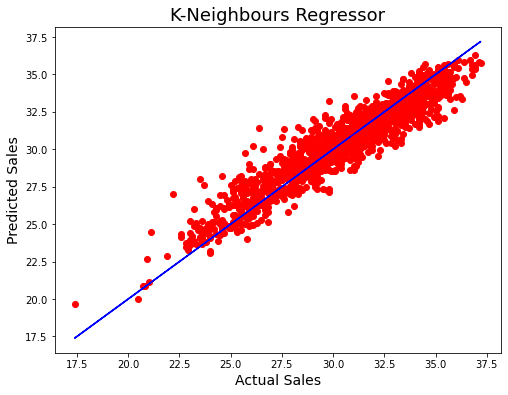

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('K-Neighbours Regressor',fontsize=18)
plt.show()

In [93]:
import joblib
joblib.dump(knr,'Maximum Temperature Forecast Model.pkl')

['Maximum Temperature Forecast Model.pkl']